# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [133]:
#data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


#"""
#DON'T MODIFY ANYTHING IN THIS CELL
#"""
#import helper

#helper.download_extract('mnist', data_dir)
#helper.download_extract('celeba', data_dir)

In [134]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

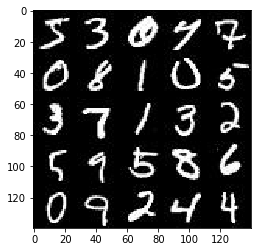

In [135]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

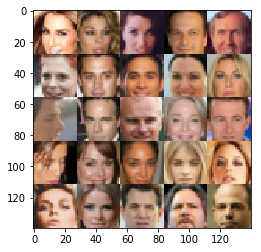

In [136]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [137]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/RobertDJarvis/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [138]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='real_input_images')
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='z_input')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return real_input_images, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [139]:
from tensorflow.contrib import learn

def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    # new_height = ((input_height - filter_height + 2 * P)/S) + 1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        relu_1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding="same", activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu_1 = tf.maximum(alpha * relu_1, relu_1) 
        relu_1 = tf.nn.dropout(relu_1, 0.85)
        
        #28x28x3    
    
        relu_2 = tf.layers.conv2d(relu_1, 128, 5, strides = 2, padding='same', activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu_2 = tf.layers.batch_normalization(relu_1, training=True)
        relu_2 = tf.maximum(alpha *  relu_2,  relu_2)
        relu_2 = tf.nn.dropout(relu_2, 0.85)
        # 14x14x128
    
        relu_3 = tf.layers.conv2d(relu_2, 256, 5, strides=2, padding='same', activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu_3 = tf.layers.batch_normalization(relu_2, training=True)
        relu_3 = tf.maximum(alpha * relu_3, relu_3)
        relu_3 = tf.nn.dropout(relu_3, 0.85)
        # 7x7x256

        # Flatten it
        flat = tf.reshape(relu_3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
        return out, logits
     


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [140]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse= not is_train):
       
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.85)
 
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, 0.85)
       
    
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, 0.85)
       
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [141]:
def model_loss(input_real, input_z, out_channel_dim, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model= generator(input_z, out_channel_dim)
    d_model_real, d_logits_real= discriminator(input_real)
    d_model_fake, d_logits_fake= discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [142]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):  
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [143]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [144]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    # Inputs
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    samples, losses = [], []
    steps = 0    
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps += 1
                
                # Get images and rescale to pass to D
                batch_images = batch_images*2 

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt , feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})

                                         
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z, lr:learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, lr:learning_rate})

                    print("Epoch {}/{}...".format(e+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
            
                
                if steps % 100 == 0:
                        
                    show_generator_output(sess, 20, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.8243... Generator Loss: 0.8066
Epoch 1/2... Discriminator Loss: 1.6125... Generator Loss: 1.2918
Epoch 1/2... Discriminator Loss: 1.4129... Generator Loss: 1.4452
Epoch 1/2... Discriminator Loss: 1.6188... Generator Loss: 0.9587
Epoch 1/2... Discriminator Loss: 1.4486... Generator Loss: 1.1072
Epoch 1/2... Discriminator Loss: 1.1738... Generator Loss: 1.6803
Epoch 1/2... Discriminator Loss: 1.1584... Generator Loss: 1.7772
Epoch 1/2... Discriminator Loss: 0.7648... Generator Loss: 2.2903
Epoch 1/2... Discriminator Loss: 1.7487... Generator Loss: 0.8608
Epoch 1/2... Discriminator Loss: 1.1299... Generator Loss: 2.0426


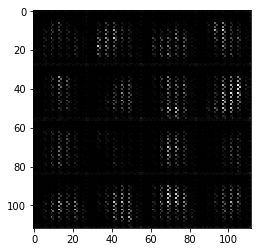

Epoch 1/2... Discriminator Loss: 1.5747... Generator Loss: 0.7564
Epoch 1/2... Discriminator Loss: 1.0254... Generator Loss: 1.8967
Epoch 1/2... Discriminator Loss: 1.2612... Generator Loss: 1.0469
Epoch 1/2... Discriminator Loss: 0.9783... Generator Loss: 1.8525
Epoch 1/2... Discriminator Loss: 2.3356... Generator Loss: 0.5772
Epoch 1/2... Discriminator Loss: 1.4330... Generator Loss: 1.2291
Epoch 1/2... Discriminator Loss: 1.4608... Generator Loss: 1.1489
Epoch 1/2... Discriminator Loss: 1.6044... Generator Loss: 0.9804
Epoch 1/2... Discriminator Loss: 1.3193... Generator Loss: 1.2938
Epoch 1/2... Discriminator Loss: 1.2336... Generator Loss: 1.2020


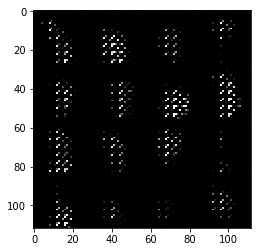

Epoch 1/2... Discriminator Loss: 1.4246... Generator Loss: 1.3047
Epoch 1/2... Discriminator Loss: 1.3269... Generator Loss: 1.1050
Epoch 1/2... Discriminator Loss: 1.4087... Generator Loss: 1.1912
Epoch 1/2... Discriminator Loss: 1.4778... Generator Loss: 1.0658
Epoch 1/2... Discriminator Loss: 1.4373... Generator Loss: 1.1535
Epoch 1/2... Discriminator Loss: 1.1366... Generator Loss: 1.3189
Epoch 1/2... Discriminator Loss: 1.3278... Generator Loss: 1.2333
Epoch 1/2... Discriminator Loss: 1.5941... Generator Loss: 1.0238
Epoch 1/2... Discriminator Loss: 1.5087... Generator Loss: 1.1607
Epoch 1/2... Discriminator Loss: 1.1865... Generator Loss: 1.2482


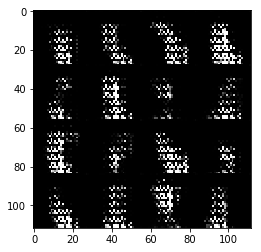

Epoch 1/2... Discriminator Loss: 1.5982... Generator Loss: 0.9769
Epoch 1/2... Discriminator Loss: 1.4824... Generator Loss: 0.8557
Epoch 1/2... Discriminator Loss: 1.4062... Generator Loss: 1.0700
Epoch 1/2... Discriminator Loss: 1.2766... Generator Loss: 1.1549
Epoch 1/2... Discriminator Loss: 1.4606... Generator Loss: 0.9205
Epoch 1/2... Discriminator Loss: 1.4063... Generator Loss: 1.0629
Epoch 1/2... Discriminator Loss: 1.5062... Generator Loss: 0.8954
Epoch 1/2... Discriminator Loss: 1.2840... Generator Loss: 1.2733
Epoch 1/2... Discriminator Loss: 1.4131... Generator Loss: 0.9829
Epoch 1/2... Discriminator Loss: 1.3231... Generator Loss: 1.0673


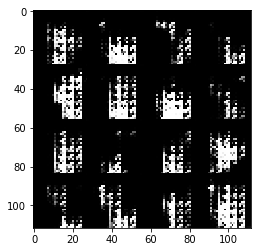

Epoch 1/2... Discriminator Loss: 1.2770... Generator Loss: 1.0735
Epoch 1/2... Discriminator Loss: 1.2862... Generator Loss: 1.0834
Epoch 1/2... Discriminator Loss: 1.3280... Generator Loss: 1.0968
Epoch 1/2... Discriminator Loss: 1.2367... Generator Loss: 1.1765
Epoch 1/2... Discriminator Loss: 1.2277... Generator Loss: 1.1987
Epoch 1/2... Discriminator Loss: 0.9309... Generator Loss: 1.6316
Epoch 1/2... Discriminator Loss: 1.0196... Generator Loss: 1.3746
Epoch 1/2... Discriminator Loss: 1.0135... Generator Loss: 1.5673
Epoch 1/2... Discriminator Loss: 1.2443... Generator Loss: 1.0957
Epoch 1/2... Discriminator Loss: 1.0884... Generator Loss: 1.4579


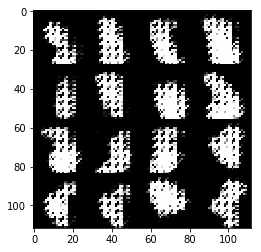

Epoch 1/2... Discriminator Loss: 1.2168... Generator Loss: 1.1655
Epoch 1/2... Discriminator Loss: 1.1686... Generator Loss: 1.2731
Epoch 1/2... Discriminator Loss: 1.1284... Generator Loss: 1.3220
Epoch 1/2... Discriminator Loss: 1.2541... Generator Loss: 1.0987
Epoch 1/2... Discriminator Loss: 1.1028... Generator Loss: 1.2635
Epoch 1/2... Discriminator Loss: 1.3226... Generator Loss: 1.1298
Epoch 1/2... Discriminator Loss: 1.1870... Generator Loss: 1.2253
Epoch 1/2... Discriminator Loss: 1.3177... Generator Loss: 1.1071
Epoch 1/2... Discriminator Loss: 1.1532... Generator Loss: 1.2359
Epoch 1/2... Discriminator Loss: 1.2010... Generator Loss: 1.1538


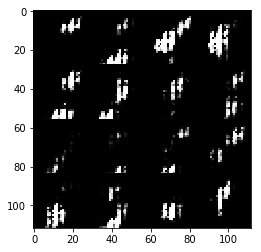

Epoch 1/2... Discriminator Loss: 1.3763... Generator Loss: 0.9222
Epoch 1/2... Discriminator Loss: 1.2110... Generator Loss: 1.1223
Epoch 1/2... Discriminator Loss: 1.3680... Generator Loss: 1.0235
Epoch 1/2... Discriminator Loss: 1.3351... Generator Loss: 1.0633
Epoch 1/2... Discriminator Loss: 1.4390... Generator Loss: 0.9934
Epoch 1/2... Discriminator Loss: 1.4424... Generator Loss: 0.9569
Epoch 1/2... Discriminator Loss: 1.4632... Generator Loss: 0.9345
Epoch 1/2... Discriminator Loss: 1.5305... Generator Loss: 0.9439
Epoch 1/2... Discriminator Loss: 1.4389... Generator Loss: 0.9336
Epoch 1/2... Discriminator Loss: 1.3855... Generator Loss: 1.0133


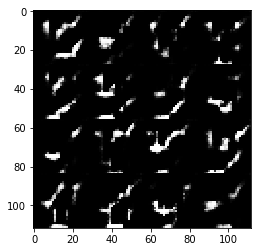

Epoch 1/2... Discriminator Loss: 1.5303... Generator Loss: 0.9597
Epoch 1/2... Discriminator Loss: 1.4882... Generator Loss: 0.9521
Epoch 1/2... Discriminator Loss: 1.4561... Generator Loss: 0.9618
Epoch 1/2... Discriminator Loss: 1.4042... Generator Loss: 0.9400
Epoch 1/2... Discriminator Loss: 1.4610... Generator Loss: 0.9473
Epoch 1/2... Discriminator Loss: 1.4711... Generator Loss: 0.9444
Epoch 1/2... Discriminator Loss: 1.4655... Generator Loss: 0.8953
Epoch 1/2... Discriminator Loss: 1.4757... Generator Loss: 0.8511
Epoch 1/2... Discriminator Loss: 1.4644... Generator Loss: 0.9197
Epoch 1/2... Discriminator Loss: 1.5535... Generator Loss: 0.8070


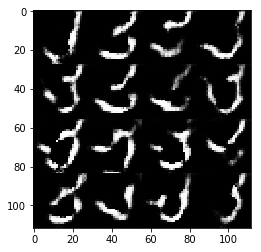

Epoch 1/2... Discriminator Loss: 1.5046... Generator Loss: 0.8877
Epoch 1/2... Discriminator Loss: 1.4663... Generator Loss: 0.8961
Epoch 1/2... Discriminator Loss: 1.4491... Generator Loss: 0.8771
Epoch 1/2... Discriminator Loss: 1.4843... Generator Loss: 0.8889
Epoch 1/2... Discriminator Loss: 1.5030... Generator Loss: 0.9018
Epoch 1/2... Discriminator Loss: 1.5229... Generator Loss: 0.8941
Epoch 1/2... Discriminator Loss: 1.4997... Generator Loss: 0.8587
Epoch 1/2... Discriminator Loss: 1.5094... Generator Loss: 0.8581
Epoch 1/2... Discriminator Loss: 1.4704... Generator Loss: 0.9119
Epoch 1/2... Discriminator Loss: 1.5129... Generator Loss: 0.9122


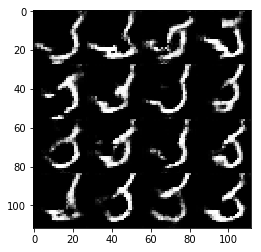

Epoch 1/2... Discriminator Loss: 1.4722... Generator Loss: 0.8680
Epoch 1/2... Discriminator Loss: 1.4919... Generator Loss: 0.8545
Epoch 1/2... Discriminator Loss: 1.4936... Generator Loss: 0.8808
Epoch 2/2... Discriminator Loss: 1.5018... Generator Loss: 0.9294
Epoch 2/2... Discriminator Loss: 1.4484... Generator Loss: 0.9116
Epoch 2/2... Discriminator Loss: 1.4526... Generator Loss: 0.8987
Epoch 2/2... Discriminator Loss: 1.5027... Generator Loss: 0.8865
Epoch 2/2... Discriminator Loss: 1.4774... Generator Loss: 0.9019
Epoch 2/2... Discriminator Loss: 1.4664... Generator Loss: 0.8659
Epoch 2/2... Discriminator Loss: 1.4630... Generator Loss: 0.8623
Epoch 2/2... Discriminator Loss: 1.4213... Generator Loss: 0.8391
Epoch 2/2... Discriminator Loss: 1.4951... Generator Loss: 0.8403
Epoch 2/2... Discriminator Loss: 1.5107... Generator Loss: 0.8590


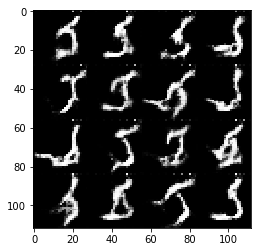

Epoch 2/2... Discriminator Loss: 1.4501... Generator Loss: 0.8322
Epoch 2/2... Discriminator Loss: 1.4818... Generator Loss: 0.8598
Epoch 2/2... Discriminator Loss: 1.4941... Generator Loss: 0.8546
Epoch 2/2... Discriminator Loss: 1.4350... Generator Loss: 0.8171
Epoch 2/2... Discriminator Loss: 1.4433... Generator Loss: 0.8445
Epoch 2/2... Discriminator Loss: 1.4586... Generator Loss: 0.8583
Epoch 2/2... Discriminator Loss: 1.4580... Generator Loss: 0.8068
Epoch 2/2... Discriminator Loss: 1.4469... Generator Loss: 0.8361
Epoch 2/2... Discriminator Loss: 1.4352... Generator Loss: 0.8465
Epoch 2/2... Discriminator Loss: 1.4281... Generator Loss: 0.8377


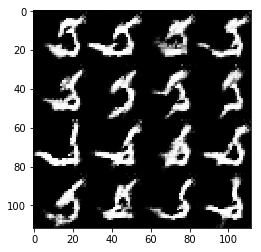

Epoch 2/2... Discriminator Loss: 1.4889... Generator Loss: 0.8320
Epoch 2/2... Discriminator Loss: 1.4339... Generator Loss: 0.8342
Epoch 2/2... Discriminator Loss: 1.4378... Generator Loss: 0.8362
Epoch 2/2... Discriminator Loss: 1.4276... Generator Loss: 0.8484
Epoch 2/2... Discriminator Loss: 1.4521... Generator Loss: 0.8210
Epoch 2/2... Discriminator Loss: 1.4784... Generator Loss: 0.8352
Epoch 2/2... Discriminator Loss: 1.4279... Generator Loss: 0.8148
Epoch 2/2... Discriminator Loss: 1.4452... Generator Loss: 0.8268
Epoch 2/2... Discriminator Loss: 1.4660... Generator Loss: 0.8464
Epoch 2/2... Discriminator Loss: 1.4406... Generator Loss: 0.8336


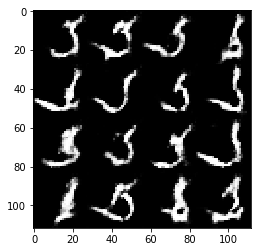

Epoch 2/2... Discriminator Loss: 1.4455... Generator Loss: 0.8459
Epoch 2/2... Discriminator Loss: 1.4162... Generator Loss: 0.8375
Epoch 2/2... Discriminator Loss: 1.4207... Generator Loss: 0.8647
Epoch 2/2... Discriminator Loss: 1.4463... Generator Loss: 0.8183
Epoch 2/2... Discriminator Loss: 1.4071... Generator Loss: 0.9000
Epoch 2/2... Discriminator Loss: 1.4126... Generator Loss: 0.8446
Epoch 2/2... Discriminator Loss: 1.3823... Generator Loss: 0.8317
Epoch 2/2... Discriminator Loss: 1.4090... Generator Loss: 0.8372
Epoch 2/2... Discriminator Loss: 1.4427... Generator Loss: 0.8237
Epoch 2/2... Discriminator Loss: 1.4159... Generator Loss: 0.8067


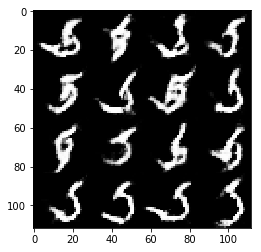

Epoch 2/2... Discriminator Loss: 1.4159... Generator Loss: 0.8430
Epoch 2/2... Discriminator Loss: 1.3990... Generator Loss: 0.8336
Epoch 2/2... Discriminator Loss: 1.4457... Generator Loss: 0.8304
Epoch 2/2... Discriminator Loss: 1.4316... Generator Loss: 0.8183
Epoch 2/2... Discriminator Loss: 1.4265... Generator Loss: 0.7987
Epoch 2/2... Discriminator Loss: 1.4190... Generator Loss: 0.8239
Epoch 2/2... Discriminator Loss: 1.4163... Generator Loss: 0.8202
Epoch 2/2... Discriminator Loss: 1.4111... Generator Loss: 0.8522
Epoch 2/2... Discriminator Loss: 1.4185... Generator Loss: 0.8209
Epoch 2/2... Discriminator Loss: 1.4767... Generator Loss: 0.7977


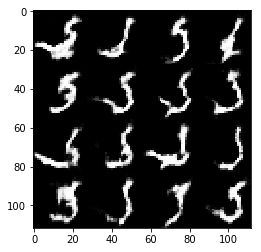

Epoch 2/2... Discriminator Loss: 1.3844... Generator Loss: 0.8291
Epoch 2/2... Discriminator Loss: 1.4125... Generator Loss: 0.8592
Epoch 2/2... Discriminator Loss: 1.4085... Generator Loss: 0.8553
Epoch 2/2... Discriminator Loss: 1.3978... Generator Loss: 0.8413
Epoch 2/2... Discriminator Loss: 1.4225... Generator Loss: 0.8372
Epoch 2/2... Discriminator Loss: 1.3770... Generator Loss: 0.8280
Epoch 2/2... Discriminator Loss: 1.4350... Generator Loss: 0.8388
Epoch 2/2... Discriminator Loss: 1.3854... Generator Loss: 0.8352
Epoch 2/2... Discriminator Loss: 1.4059... Generator Loss: 0.8416
Epoch 2/2... Discriminator Loss: 1.4122... Generator Loss: 0.8308


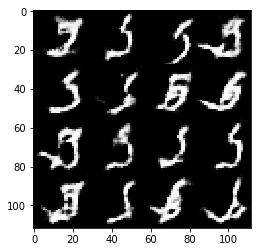

Epoch 2/2... Discriminator Loss: 1.3908... Generator Loss: 0.8091
Epoch 2/2... Discriminator Loss: 1.4272... Generator Loss: 0.8194
Epoch 2/2... Discriminator Loss: 1.4206... Generator Loss: 0.8226


KeyboardInterrupt: 

In [145]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.9469... Generator Loss: 0.6485
Epoch 1/1... Discriminator Loss: 1.8753... Generator Loss: 0.6992
Epoch 1/1... Discriminator Loss: 1.6281... Generator Loss: 1.0683
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 1.0745
Epoch 1/1... Discriminator Loss: 1.4941... Generator Loss: 1.2046
Epoch 1/1... Discriminator Loss: 1.5022... Generator Loss: 0.9673
Epoch 1/1... Discriminator Loss: 1.3615... Generator Loss: 1.4673
Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 1.2883
Epoch 1/1... Discriminator Loss: 1.4726... Generator Loss: 1.3419
Epoch 1/1... Discriminator Loss: 1.6196... Generator Loss: 0.7583


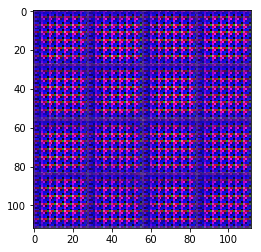

Epoch 1/1... Discriminator Loss: 1.0257... Generator Loss: 1.8676
Epoch 1/1... Discriminator Loss: 0.9247... Generator Loss: 2.0322
Epoch 1/1... Discriminator Loss: 1.4099... Generator Loss: 1.0144
Epoch 1/1... Discriminator Loss: 2.7824... Generator Loss: 0.2372
Epoch 1/1... Discriminator Loss: 0.9713... Generator Loss: 2.5901
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 1.2248
Epoch 1/1... Discriminator Loss: 1.8460... Generator Loss: 0.6191
Epoch 1/1... Discriminator Loss: 0.7430... Generator Loss: 2.9152
Epoch 1/1... Discriminator Loss: 0.7104... Generator Loss: 2.3668
Epoch 1/1... Discriminator Loss: 1.9550... Generator Loss: 0.5224


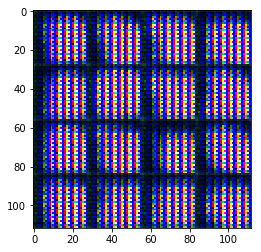

Epoch 1/1... Discriminator Loss: 1.2527... Generator Loss: 1.6377
Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 1.1716
Epoch 1/1... Discriminator Loss: 1.0114... Generator Loss: 2.3079
Epoch 1/1... Discriminator Loss: 1.0462... Generator Loss: 1.8440
Epoch 1/1... Discriminator Loss: 1.7244... Generator Loss: 0.6574
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 1.9143
Epoch 1/1... Discriminator Loss: 1.1494... Generator Loss: 1.2172
Epoch 1/1... Discriminator Loss: 0.9844... Generator Loss: 1.8801
Epoch 1/1... Discriminator Loss: 1.0623... Generator Loss: 1.2450
Epoch 1/1... Discriminator Loss: 1.4070... Generator Loss: 0.9850


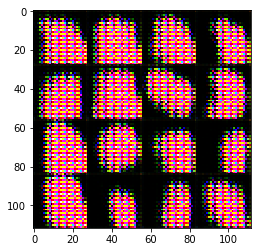

Epoch 1/1... Discriminator Loss: 1.1939... Generator Loss: 1.2634
Epoch 1/1... Discriminator Loss: 0.9972... Generator Loss: 1.6369
Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 1.5176
Epoch 1/1... Discriminator Loss: 0.9893... Generator Loss: 1.3884
Epoch 1/1... Discriminator Loss: 1.8170... Generator Loss: 0.5740
Epoch 1/1... Discriminator Loss: 1.0536... Generator Loss: 1.6548
Epoch 1/1... Discriminator Loss: 0.8675... Generator Loss: 1.7946
Epoch 1/1... Discriminator Loss: 1.0805... Generator Loss: 1.2241
Epoch 1/1... Discriminator Loss: 0.9080... Generator Loss: 1.8499
Epoch 1/1... Discriminator Loss: 1.0755... Generator Loss: 1.2753


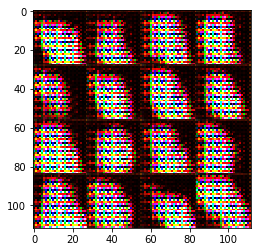

Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 1.2807
Epoch 1/1... Discriminator Loss: 1.0644... Generator Loss: 1.5164
Epoch 1/1... Discriminator Loss: 1.2492... Generator Loss: 1.1895
Epoch 1/1... Discriminator Loss: 0.9215... Generator Loss: 1.8022
Epoch 1/1... Discriminator Loss: 0.9239... Generator Loss: 1.5417
Epoch 1/1... Discriminator Loss: 0.9612... Generator Loss: 1.4234
Epoch 1/1... Discriminator Loss: 1.0138... Generator Loss: 1.6494
Epoch 1/1... Discriminator Loss: 1.0782... Generator Loss: 1.4996
Epoch 1/1... Discriminator Loss: 1.0175... Generator Loss: 1.4801
Epoch 1/1... Discriminator Loss: 0.9295... Generator Loss: 1.6741


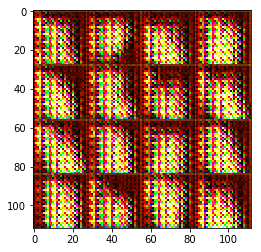

In [146]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.